In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/movies.csv')
dimensions = ['valence', 'energy', 'darkness', 'tension', 'warmth', 'humor']

Movies were measured on six different dimensions - valence (or positivity), energy, darkness, tension, warmth, and humor. These were extracted from the movie plot using SBERT, and then adjusted using genre information and user defined tags.

Dimension Mean Standard Deviation
valence -0.1302444813108936 0.3739225188962687
energy 0.22028117178698242 0.18740884352601778
darkness 0.06631480654043191 0.13485328292683105
tension 0.23190287415272096 0.16216831824883787
warmth -0.030842481803032677 0.18316372095911096
humor 0.030357035702865392 0.13063561539774715


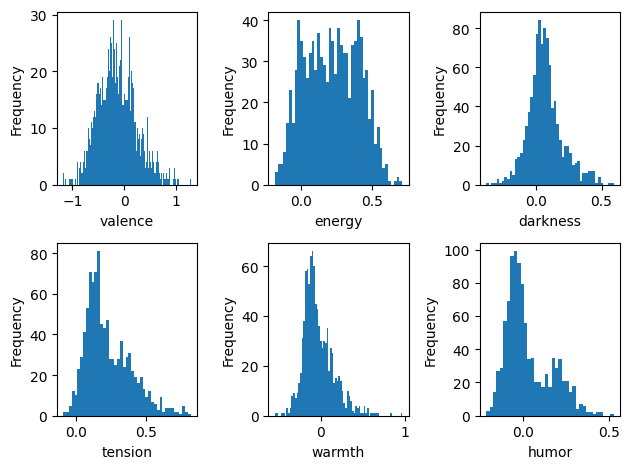

In [15]:
plt.subplots(nrows=2, ncols=3)
print("Dimension", "Mean", "Standard Deviation")

for i in range(len(dimensions)):
    data = df[dimensions[i]]
    print(dimensions[i], data.mean(), data.std())

    plt.subplot(2, 3, i + 1)
    plt.hist(data, bins=np.arange(min(data), max(data) + 0.02, 0.02))
    plt.xlabel(dimensions[i])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Tension, warmth, and humor are skewed right while valence, energy, and darkness are normally distributed. The energy distribution is less peaked than the other two normal distributions and is centered around 0.25 rather than near 0.0.

Tension and humor both have a second, smaller peak to the right of their larger one. This is likely due to genre adjustments. Movies marked as thrillers and comedies have a +.2 boost to tension and humor, respectively.

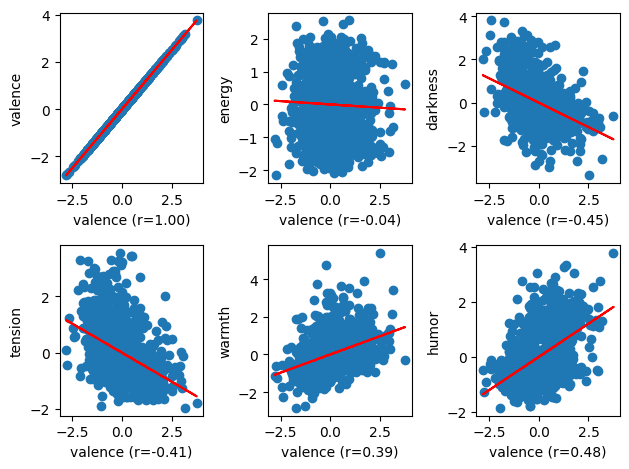

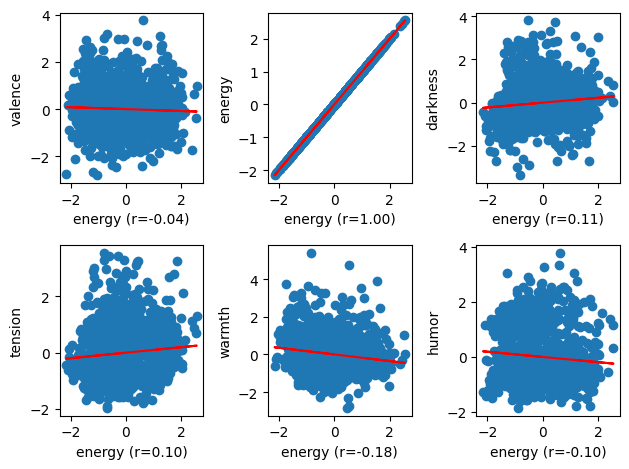

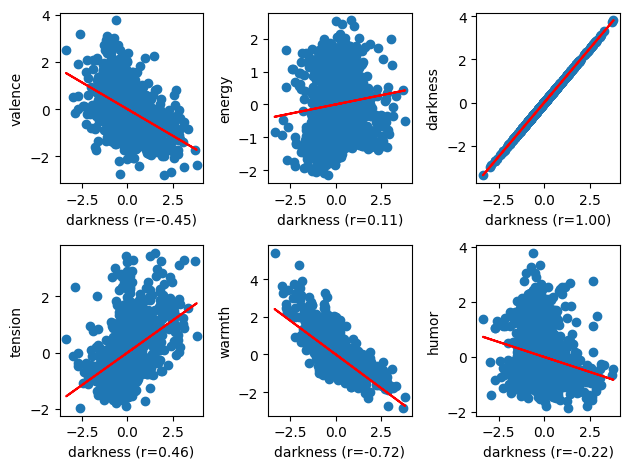

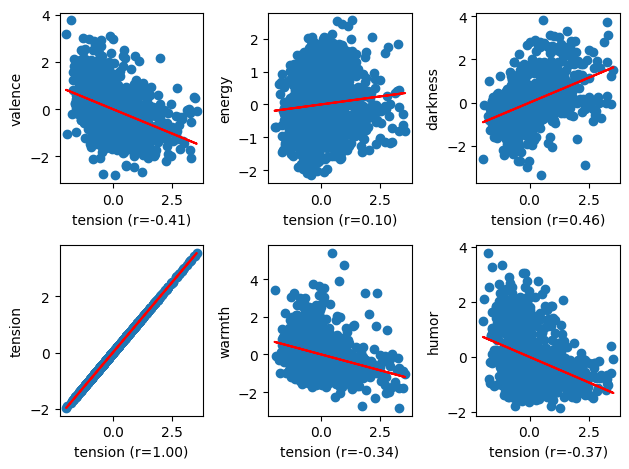

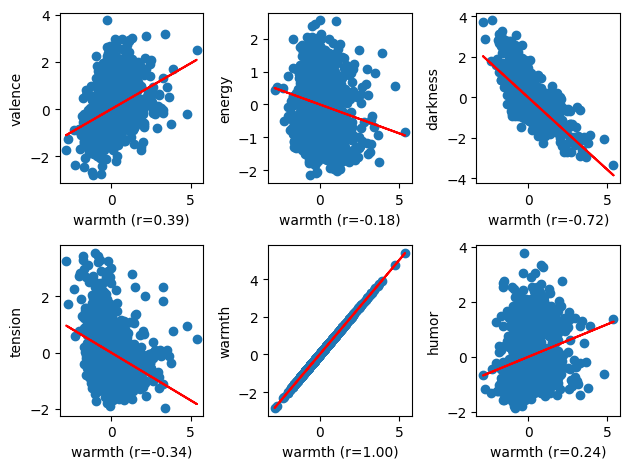

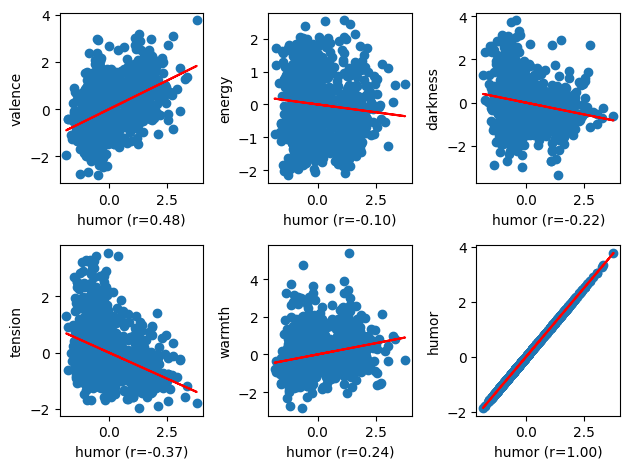

In [25]:
df = pd.read_csv('data/movies-z.csv')

for i in range(len(dimensions)):
    plt.subplots(2, 3)

    for j in range(len(dimensions)):
        x_axis = df[dimensions[i]]
        y_axis = df[dimensions[j]]

        plt.subplot(2, 3, j + 1)
        plt.scatter(x_axis, y_axis)

        slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
        plt.plot(x_axis, slope * x_axis + intercept, color='red')

        plt.xlabel(f"{dimensions[i]} (r={r_value:.2f})")
        plt.ylabel(dimensions[j])

    plt.tight_layout()
    plt.show()

Valence seems to act as a "hub" dimension in that it is moderately correlated with every other dimension except energy. This may be a point of optimization for the ranking algorithm.

Additionally, darkness and warmth are strongly correlated. These two dimensions are likely redundant and interfere with cosine similarity of songs. Rather than having a warmth dimension, it may be beneficial to focus on other aspects of movies that may be overlooked with the current space, e.g. romanticism. Warmth then can either be dropped entirely or combined with darkness. The only issue with this approach is finding a way to extract a new abstract category from songs without lyrics.